In [1]:
%matplotlib inline

import urllib.request
import io
import zipfile

from pathlib import Path
import os

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB

import igraph as ig

In [2]:
#G = nx.watts_strogatz_graph(n, k, p, seed=None)
#Parameters
#n int The number of nodes
#k int Each node is joined with its k nearest neighbors in a ring topology.
#p float The probability of rewiring each edge
# seed integer, random_state, or None (default)Indicator of random number generation state.

In [3]:
#G = nx.connected_watts_strogatz_graph(n, k, p, tries=100, seed=None)
#Parameters
#n int The number of nodes
#k int Each node is joined with its k nearest neighbors in a ring topology.
#p float The probability of rewiring each edge
#tries int Number of attempts to generate a connected graph.
#seed integer, random_state, or None (default) Indicator of random number generation state.

In [4]:
#G = nx.newman_watts_strogatz_graph(n, k, p, seed=None)
#Returns a Newman–Watts–Strogatz small-world graph.
#Parameters
#n int The number of nodes.
#k int Each node is joined with its k nearest neighbors in a ring topology.
#p float The probability of adding a new edge for each edge.
#seed integer, random_state, or None (default) Indicator of random number generation state.

In [5]:
#url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

#sock = urllib.request.urlopen(url)  # open URL
#s = io.BytesIO(sock.read())  # read into BytesIO "file"
#sock.close()

#zf = zipfile.ZipFile(s)  # zipfile object
#txt = zf.read("football.txt").decode()  # read info file
#gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
#gml = gml.split("\n")[1:]
#G = nx.parse_gml(gml)  # parse gml data

#print(txt)
# print degree for each team - number of games
#for n, d in G.degree():
#    print(f"{n:20} {d:2}")

#options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

#pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
#nx.draw(G, pos, **options)
#plt.show()

In [6]:
#G=nx.read_edgelist("/home/jossian/repository/tukey/instances/ca-GrQc.txt.gz")

In [7]:
#karate = ig.Graph.Read_GraphML("/home/jossian/repository/tukey_depth/src/instances/zachary.graphml")

#ig.summary(karate)

#inst_="karate"
#instance_=f"{inst_}"
#G = nx.read_gml(f"../instances/{inst_}/{instance_}.gml.gz",destringizer=int)

#n = G.vcount()
#print(n)

#m = G.ecount()
#print(m)

#len(G.cliques())

#print(G.maximal_independent_vertex_sets())
#print(nx.maximal_independent_set(G))
#igraph_maximal_independent_vertex_sets(G)

#karate.independence_number()

#karate.distances(2)
#A = nx.Graph(G)
#A = ig.Graph.from_networkx(G)
#tmp = len(A.maximal_independent_vertex_sets())
#print(tmp)

In [8]:
# instances

#G = ig.Graph.Famous("petersen")
#ig.plot(G)

#g = ig.Graph.Erdos_Renyi(n=50, p=0.2, directed=False, loops=False)
#ig.plot(g)

#inst_="example"
#G = nx.Graph()
#list0 = [0,1,2,3,4,5]
#G.add_nodes_from(list0)
#G.add_edge(0,2)
#G.add_edge(1,2)
#G.add_edge(2,3)
#G.add_edge(3,4)
#G.add_edge(4,5)

#inst_="karate"
#G = nx.karate_club_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")
#nx.write_graphml(G, f"../instances/{inst_}.graphml")

#inst_="petersen"
#G = nx.petersen_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#dim=50
#inst_=f"tree_{dim}"
#for id in range(1,11):
#    G = nx.random_tree(50)
#    nx.write_gml(G, f"../instances/{inst_}_{id}.gml.gz",stringizer=int)

#dim=500
#inst_=f"internet_graph_{dim}"
#for id in range(1,11):
#    G = nx.random_internet_as_graph(dim)
#    nx.write_gml(G, f"../instances/{inst_}_{id}.gml.gz")

# erdos_renyi_graph(n, p, seed=None, directed=False)
#G = nx.erdos_renyi_graph(50,0.1)

# barabasi_albert_graph(n, m, seed=None, initial_graph=None)
#G = nx.barabasi_albert_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#dim=100
#inst_=f"erdos_renyi_{dim}"
#for id in range(1,11):
#    GI = ig.Graph.Erdos_Renyi(n=dim, p=0.2, directed=False, loops=False)
#    A = ig.Graph.get_edgelist(GI)
#    G = nx.Graph(A)
#    #G = ig.Graph.to_networkx(GI)
#    nx.write_gml(G, f"../instances/{inst_}_{id}.gml.gz",stringizer=int)

#inst_="les_miserables"
#G = nx.les_miserables_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#inst_="dodecahedral_graph"
#G = nx.dodecahedral_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#inst_="cube"
#G = nx.Graph()
#list = [0,1,2,3,4,5,6,7]
#G.add_nodes_from(list)
#G.add_edge(0,1)
#G.add_edge(0,4)
#G.add_edge(0,3)
#G.add_edge(1,2)
#G.add_edge(1,5)
#G.add_edge(2,3)
#G.add_edge(2,6)
#G.add_edge(3,7)
#G.add_edge(4,5)
#G.add_edge(4,7)
#G.add_edge(5,6)
#G.add_edge(6,7)
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#inst_="moser_spindle_modi"
#G = nx.Graph()
#list = [0,1,2,3,4,5,6]
#G.add_nodes_from(list)
#G.add_edge(0,1)
#G.add_edge(0,2)
#G.add_edge(0,5)
#G.add_edge(0,6)
#G.add_edge(1,2)
#G.add_edge(1,3)
#G.add_edge(2,3)
#G.add_edge(3,4)
#G.add_edge(4,5)
#G.add_edge(4,6)
#G.add_edge(5,6)
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#inst_="circut_example"
#G = nx.Graph()
#list = [0,1,2,3,4,5]
#G.add_nodes_from(list)
#G.add_edge(0,1)
#G.add_edge(1,2)
#G.add_edge(2,3)
#G.add_edge(3,4)
#G.add_edge(4,5)
#G.add_edge(5,0)
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")


In [9]:
#G.nodes
#G.edges
#nx.is_connected(G)
#G.number_of_nodes()
#G.number_of_edges()
#nx.draw(G,  with_labels = True)


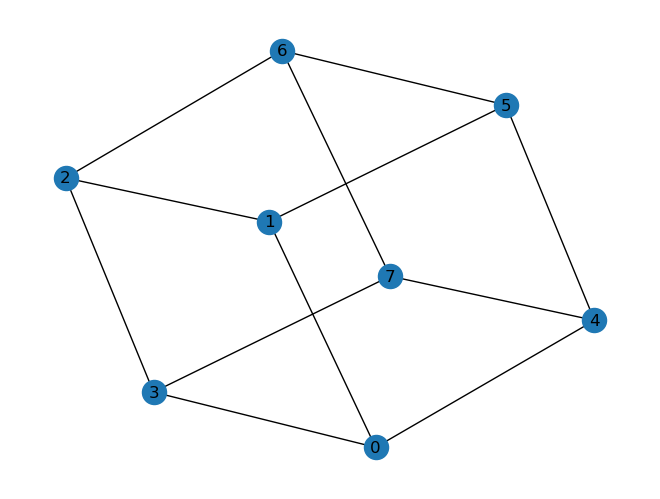

In [10]:
inst_="cube"
instance_=f"{inst_}"
G = nx.read_gml(f"../instances/{inst_}/{instance_}.gml.gz",destringizer=int)

#ig.plot(GI)
#nx.draw_networkx_labels(G,pos=nx.spring_layout(G))
nx.draw(G,  with_labels = True)

In [11]:
nx.is_connected(G)

True

In [12]:
G.number_of_nodes()

8

In [13]:
G.number_of_edges()

12

In [14]:
A = ig.Graph.from_networkx(G)
#Im = nx.maximal_independent_set(T)
Im = A.maximal_independent_vertex_sets()
print(Im)                

[(0, 2, 5, 7), (0, 6), (2, 4), (1, 3, 4, 6), (1, 7), (3, 5)]


In [16]:
Nu = nx.neighbors(G,0)
            
listNu = []
for j in Nu:
    listNu.append(j)

print(listNu)

[1, 4, 3]


1
4
3


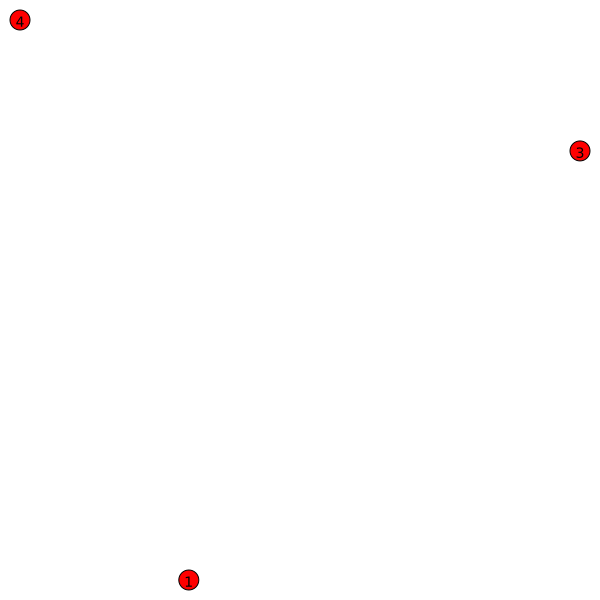

In [17]:
T = nx.Graph()
Z = ig.Graph()
T.add_nodes_from(listNu)
Z.add_vertices(listNu)

Z.vs["name"] = [1,4,3]
Z.vs["label"] = Z.vs["name"]
#del(T.vs["_nx_name"])

#print(Z)
#Z.vs

#labels_dict={0: '1', 1: '4', 2: '3'}
#labels=list(labels_dict.values())

for i in Z.vs:
    print(i["name"])


#ig.plot(Z, vertex_label =  labels)

#                for (a,b) in combinations(listNu,2):
#                    if G.has_edge(a,b):
#                        T.add_edge(a,b)
#                        Z.add_edges([(a,b)])

                #nx.draw(T,  with_labels = True)

ig.plot(Z)


In [18]:
Z = ig.Graph()

In [19]:
print(Z)

IGRAPH U--- 0 0 --


In [20]:
# maximal independent set
list_miset = A.maximal_independent_vertex_sets()

tmp = len(list_miset)
print("tam lmiset: %d" %(tmp))
if tmp > 0:
    for id in list_miset:
        print(id)
        #tmp1 = len(id)
        #print("tam item lmiset: %d " %(tmp1))
        #for id1 in id:
        #    print(id1)
        #list.append(id)
        #print(list)


tam lmiset: 6
(0, 2, 5, 7)
(0, 6)
(2, 4)
(1, 3, 4, 6)
(1, 7)
(3, 5)


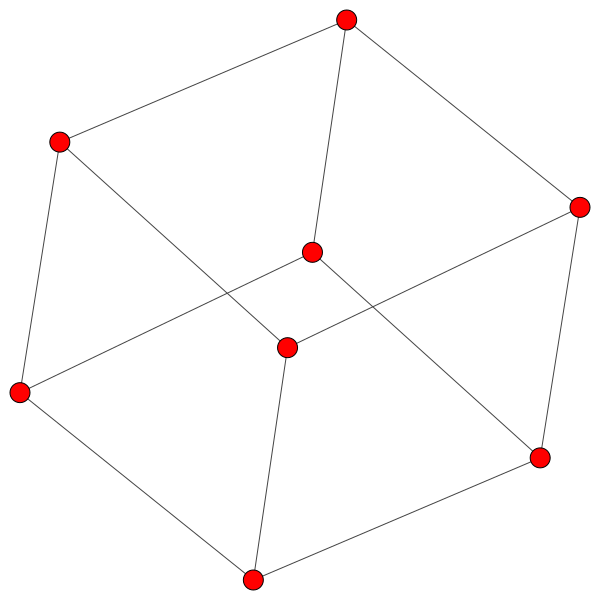

In [21]:
ig.plot(A)

In [23]:
#H = nx.read_gml(f"../instances/{inst_}.gml",destringizer=int)
#H = nx.read_gml(f"../instances/{inst_}.gml.gz",destringizer=int)

In [24]:
#H.nodes

In [25]:
#instance

inst_="internet_graph"
dim_=200
table = pd.DataFrame()
for id_ in range(1,11):
    list = []
    instance_=f"{inst_}_{dim_}_{id_}"
    G = nx.read_gml(f"../instances/{inst_}/{dim_}/{instance_}.gml.gz",destringizer=int)
    dados = pd.DataFrame({
        'id':id_,
        'nodes':G.number_of_nodes(),
        'edges':G.number_of_edges(),
        'diameter':nx.diameter(G)
    },index=["teste"]
    )
    table = pd.concat([table, dados], ignore_index=True)

In [26]:
table

,id,nodes,edges,diameter
0,1,200,283,5
1,2,200,284,6
2,3,200,285,6
3,4,200,273,5
4,5,200,283,6
5,6,200,280,5
6,7,200,290,5
7,8,200,289,6
8,9,200,279,6
9,10,200,281,6


In [27]:
print(table[['id',"nodes","edges","diameter"]].to_latex(index=False,float_format="%.1f"))

\begin{tabular}{rrrr}
\toprule
id & nodes & edges & diameter \\
\midrule
1 & 200 & 283 & 5 \\
2 & 200 & 284 & 6 \\
3 & 200 & 285 & 6 \\
4 & 200 & 273 & 5 \\
5 & 200 & 283 & 6 \\
6 & 200 & 280 & 5 \\
7 & 200 & 290 & 5 \\
8 & 200 & 289 & 6 \\
9 & 200 & 279 & 6 \\
10 & 200 & 281 & 6 \\
\bottomrule
\end{tabular}



In [28]:
#instance

inst_="internet_graph"
dim_=200
instance_=f"{inst_}_{dim_}_1"
G = nx.read_gml(f"../instances/{inst_}/{dim_}/{instance_}.gml.gz",destringizer=int)

In [35]:
nx.write_edgelist(G, f"{instance_}.edges", delimiter=' ', data = False)

In [32]:
G.number_of_nodes()

200

In [33]:
G.number_of_edges()

283